In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def conf_matrix (y,y_hat):
  dic={"TN":0,"TP":0,"FN":0,"FP" : 0}

  for i in range(len(y)):
    if y_hat[i] == 0:
      if y[i] == 0:
        dic["TN"] += 1
      else:
        dic["FN"] += 1
    else:
      if y[i] == 1:
        dic["TP"] += 1
      else:
        dic["FP"] += 1
  return dic

def recall(dic):
  return dic["TP"]/(dic["TP"]+dic["FN"])
def precision (dic):
  return dic["TP"]/(dic["TP"]+dic["FP"])
def F1 (dic):
  return 2 * precision(dic)*recall(dic) / (precision(dic)+recall(dic))

def sigmoid(h):
  return 1 / (1+ np.exp(-h))

def bin_cross_entropy(y,p_hat):
  return -(1/len(y))* np.sum(y*np.log(p_hat)+(1-y)*np.log(1-p_hat))

def accuracy (y,y_hat):
  return np.mean(y==y_hat)



def one_hot_encode(y):
  N = len(y)
  k = len(set(y))

  Y = np.zeros((N,k))
  for i in range(N):
    Y[i,y[i]] = 1
  return Y

class slr():
  def __init__(self,thresh = 0.5):
    self.thresh = thresh
    self.w = None
    self.B = None
  
  def fit( self, x, y, eta = 1e-3, epochs = 1e3, show_curve = False):
    epochs = int(epochs)
    N,D = x.shape

    # initialize w and B
    self.w = np.random.randn(D)
    self.B = np.random.randn(1)

    J = np.zeros(epochs)

    for epoch in range(epochs):
      p_hat = self.__forward__(x)
      J[epoch] = bin_cross_entropy(y,p_hat)

      self.w -= eta*(1/N)*x.T@(p_hat-y)
      self.B -= eta*(1/N)*np.sum(p_hat-y)

    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel("epochs")
      plt.ylabel("$\mathcal{J}$")
      plt.title("Training Curve")
    
  def __forward__(self,x):
      return sigmoid(x@self.w + self.B)
  def predict(self,x):
      return(self.__forward__(x)>=self.thresh).astype(np.int32)

In [56]:
data = pd.read_csv("/content/drive/MyDrive/enhanceIT/churn.csv")

# one hot encode
data["is_female"] = data["Gender"] == "Female"
data["is_france"] = data["Geography"] == "France"
data["is_germany"] = data["Geography"] == "Germany"
data["is_spain"] = data["Geography"] == "Spain"

# change to int type
data["Balance"] = data["Balance"].astype(int)
data["EstimatedSalary"]=data["EstimatedSalary"].astype(int)
data["is_france"] = data["is_france"].astype(int)
data["is_germany"]=data["is_germany"].astype(int)
data["is_spain"]=data["is_spain"].astype(int)
data["is_female"]=data["is_female"].astype(int)

# normalize data
maxx = max(data["Balance"])
minn = min(data["Balance"])
data["Balance"] = (data["Balance"] - minn)/(maxx - minn)

maxx = max(data["Age"])
minn = min(data["Age"])
data["Age"] = (data["Age"] - minn)/(maxx - minn)

# final data
d = data[["Age","Exited","is_female","IsActiveMember","Balance","is_france","is_germany"]]



7000
           Age  is_female  IsActiveMember   Balance  is_france  is_germany
93    0.148649          0               1  0.000000          1           0
5689  0.432432          1               1  0.526461          0           0
1209  0.189189          1               0  0.000000          1           0
6230  0.716216          0               1  0.000000          1           0
966   0.216216          1               1  0.557238          1           0
...        ...        ...             ...       ...        ...         ...
9981  0.324324          0               1  0.605979          0           1
9982  0.378378          1               0  0.546617          0           1
9991  0.472973          1               0  0.352259          1           0
9997  0.243243          1               1  0.000000          1           0
9998  0.324324          0               0  0.299225          0           1

[2887 rows x 6 columns]
2887


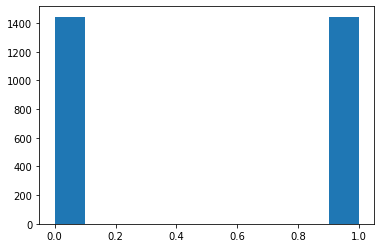

In [101]:
# split train and test set
vald_set = d.sample(frac = 0.3,random_state =8)
train_data =d.drop(vald_set.index)
#print(len(train_data))

# split train data into 0 and 1 for Exited
d_0 = train_data[train_data.Exited == 0]
d1 = train_data[train_data.Exited == 1]

# split train data into equal amount of 0 and 1 for Exited
d_0_half = d_0.sample(frac = 0.26,random_state =25)
train_data = pd.concat([d_0_half, d1])




vald_data = vald_set.sample(frac = 0.5,random_state =45)
test_data = vald_set.drop(vald_data.index)

whole_y = d["Exited"]
whole_x = d.drop("Exited", axis = 1)

train_y = train_data["Exited"]
vald_y = vald_data["Exited"]
test_y = test_data["Exited"]

train_x = train_data.drop("Exited",axis = 1)
#print(train_x)
vald_x = vald_data.drop("Exited",axis = 1)
test_x = test_data.drop("Exited",axis = 1)

#plt.hist(train_data['Exited'])
#print(len(train_data))
train_x = train_x.to_numpy()
train_y = train_y.to_numpy()
vald_x = vald_x.to_numpy()
vald_y = vald_y.to_numpy()
test_x = test_x.to_numpy()
test_y = test_y.to_numpy()



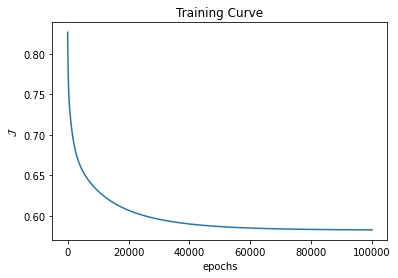

In [104]:
log_reg = slr()
log_reg.fit(train_x,train_y,epochs =1e5, eta = 8e-3,show_curve = True)
y_hat = log_reg.predict(vald_x)



In [106]:
print(f"Accruacy: {accuracy(vald_y,y_hat):0.4f}")
dic = conf_matrix (vald_y,y_hat)
print(dic)
print(f"Recall: {recall(dic):0.4f}")
print(f"Precision: {precision(dic):0.4f}")
print(f"F1: {F1(dic):0.4f}")

Accruacy: 0.7047
{'TN': 823, 'TP': 234, 'FN': 77, 'FP': 366}
Recall: 0.7524
Precision: 0.3900
F1: 0.5137


In [107]:
y_hat = log_reg.predict(test_x)
print(f"Accruacy: {accuracy(test_y,y_hat):0.4f}")
dic = conf_matrix (test_y,y_hat)
print(dic)
print(f"Recall: {recall(dic):0.4f}")
print(f"Precision: {precision(dic):0.4f}")
print(f"F1: {F1(dic):0.4f}")

Accruacy: 0.7053
{'TN': 851, 'TP': 207, 'FN': 77, 'FP': 365}
Recall: 0.7289
Precision: 0.3619
F1: 0.4836
